In [6]:
from neo4j import GraphDatabase
import networkx as nx
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv()

True

In [7]:
driver = GraphDatabase.driver("neo4j://localhost:7687", auth=(os.getenv("NEO4J_USER"), os.getenv("NEO4J_PW")))

In [11]:
with driver.session() as session:
    session.run("MATCH (n) DETACH DELETE n;")
    result = session.run("""
        CREATE 
            (a:Person {name:'Alice', age:30, city:'Berlin'}), 
            (b:Person {name:'Bob', age:25, city:'Paris'}), 
            (c:Person {name:'Carol', age:28, city:'Rome'}), 
            (a)-[:FRIEND_OF]->(b), 
            (b)-[:FRIEND_OF]->(c), 
            (a)-[:FRIEND_OF]->(c);
    """)

/tmp/ipykernel_9139/3750840747.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


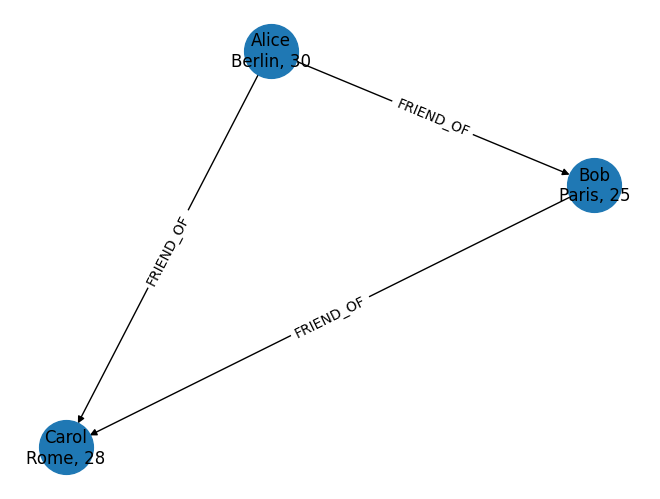

In [15]:
with driver.session() as s:
    # Return plain dicts for node props + rel type string
    q = """
    MATCH (a)-[r]->(b)
    RETURN a.name AS aName, properties(a) AS aProps,
           b.name AS bName, properties(b) AS bProps,
           type(r) AS relType
    """
    result = s.run(q)

    G = nx.DiGraph()
    for rec in result:
        G.add_node(rec["aName"], **rec["aProps"])
        G.add_node(rec["bName"], **rec["bProps"])
        G.add_edge(rec["aName"], rec["bName"], rel=rec["relType"])

# layout + labels (show some properties)
pos = nx.spring_layout(G)
node_labels = {n: f"{n}\n{d.get('city','')}, {d.get('age','')}" for n, d in G.nodes(data=True)}
edge_labels = {(u,v): d["rel"] for u,v,d in G.edges(data=True)}

nx.draw(G, pos, with_labels=False, node_size=1500)
nx.draw_networkx_labels(G, pos, node_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.tight_layout(); plt.show()